**Ari Arnaldo**
**09011181823006** 

Mendeteksi penyakit jantung menggunakan Support Vector Mechine (SVM)

SVM merupakan suatu teknik untuk melakukan prediksi, baik dalam kasus klasifikasi maupun regresi. Fungsi untuk mengklasifikasi yang di cari adalah fungsi linier. Fungsi
ini bisa didefinisikan sebagai
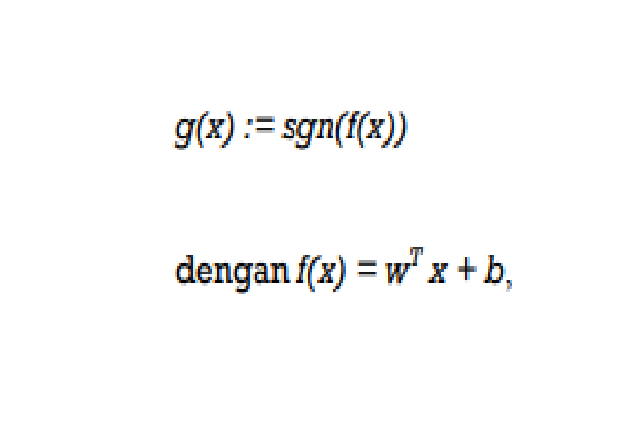

Penyakit jantung menggambarkan berbagai kondisi yang memengaruhi jantung Anda.

# Import

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.   **Pandas** (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data.
2.   **NumPy** (Numerical Python) adalah library Python yang fokus pada scientific computing.
3.   **Matplotlib** adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik
4.   **Seaborn** adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik 

# Load Dataset
Memuat kumpulan data

In [154]:
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [156]:
# 1 menjadi Penyakit Jantung 0 menjadi Tidak Ada Penyakit Jantung
df['target'].unique()


array([1, 0])

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Gambaran data set

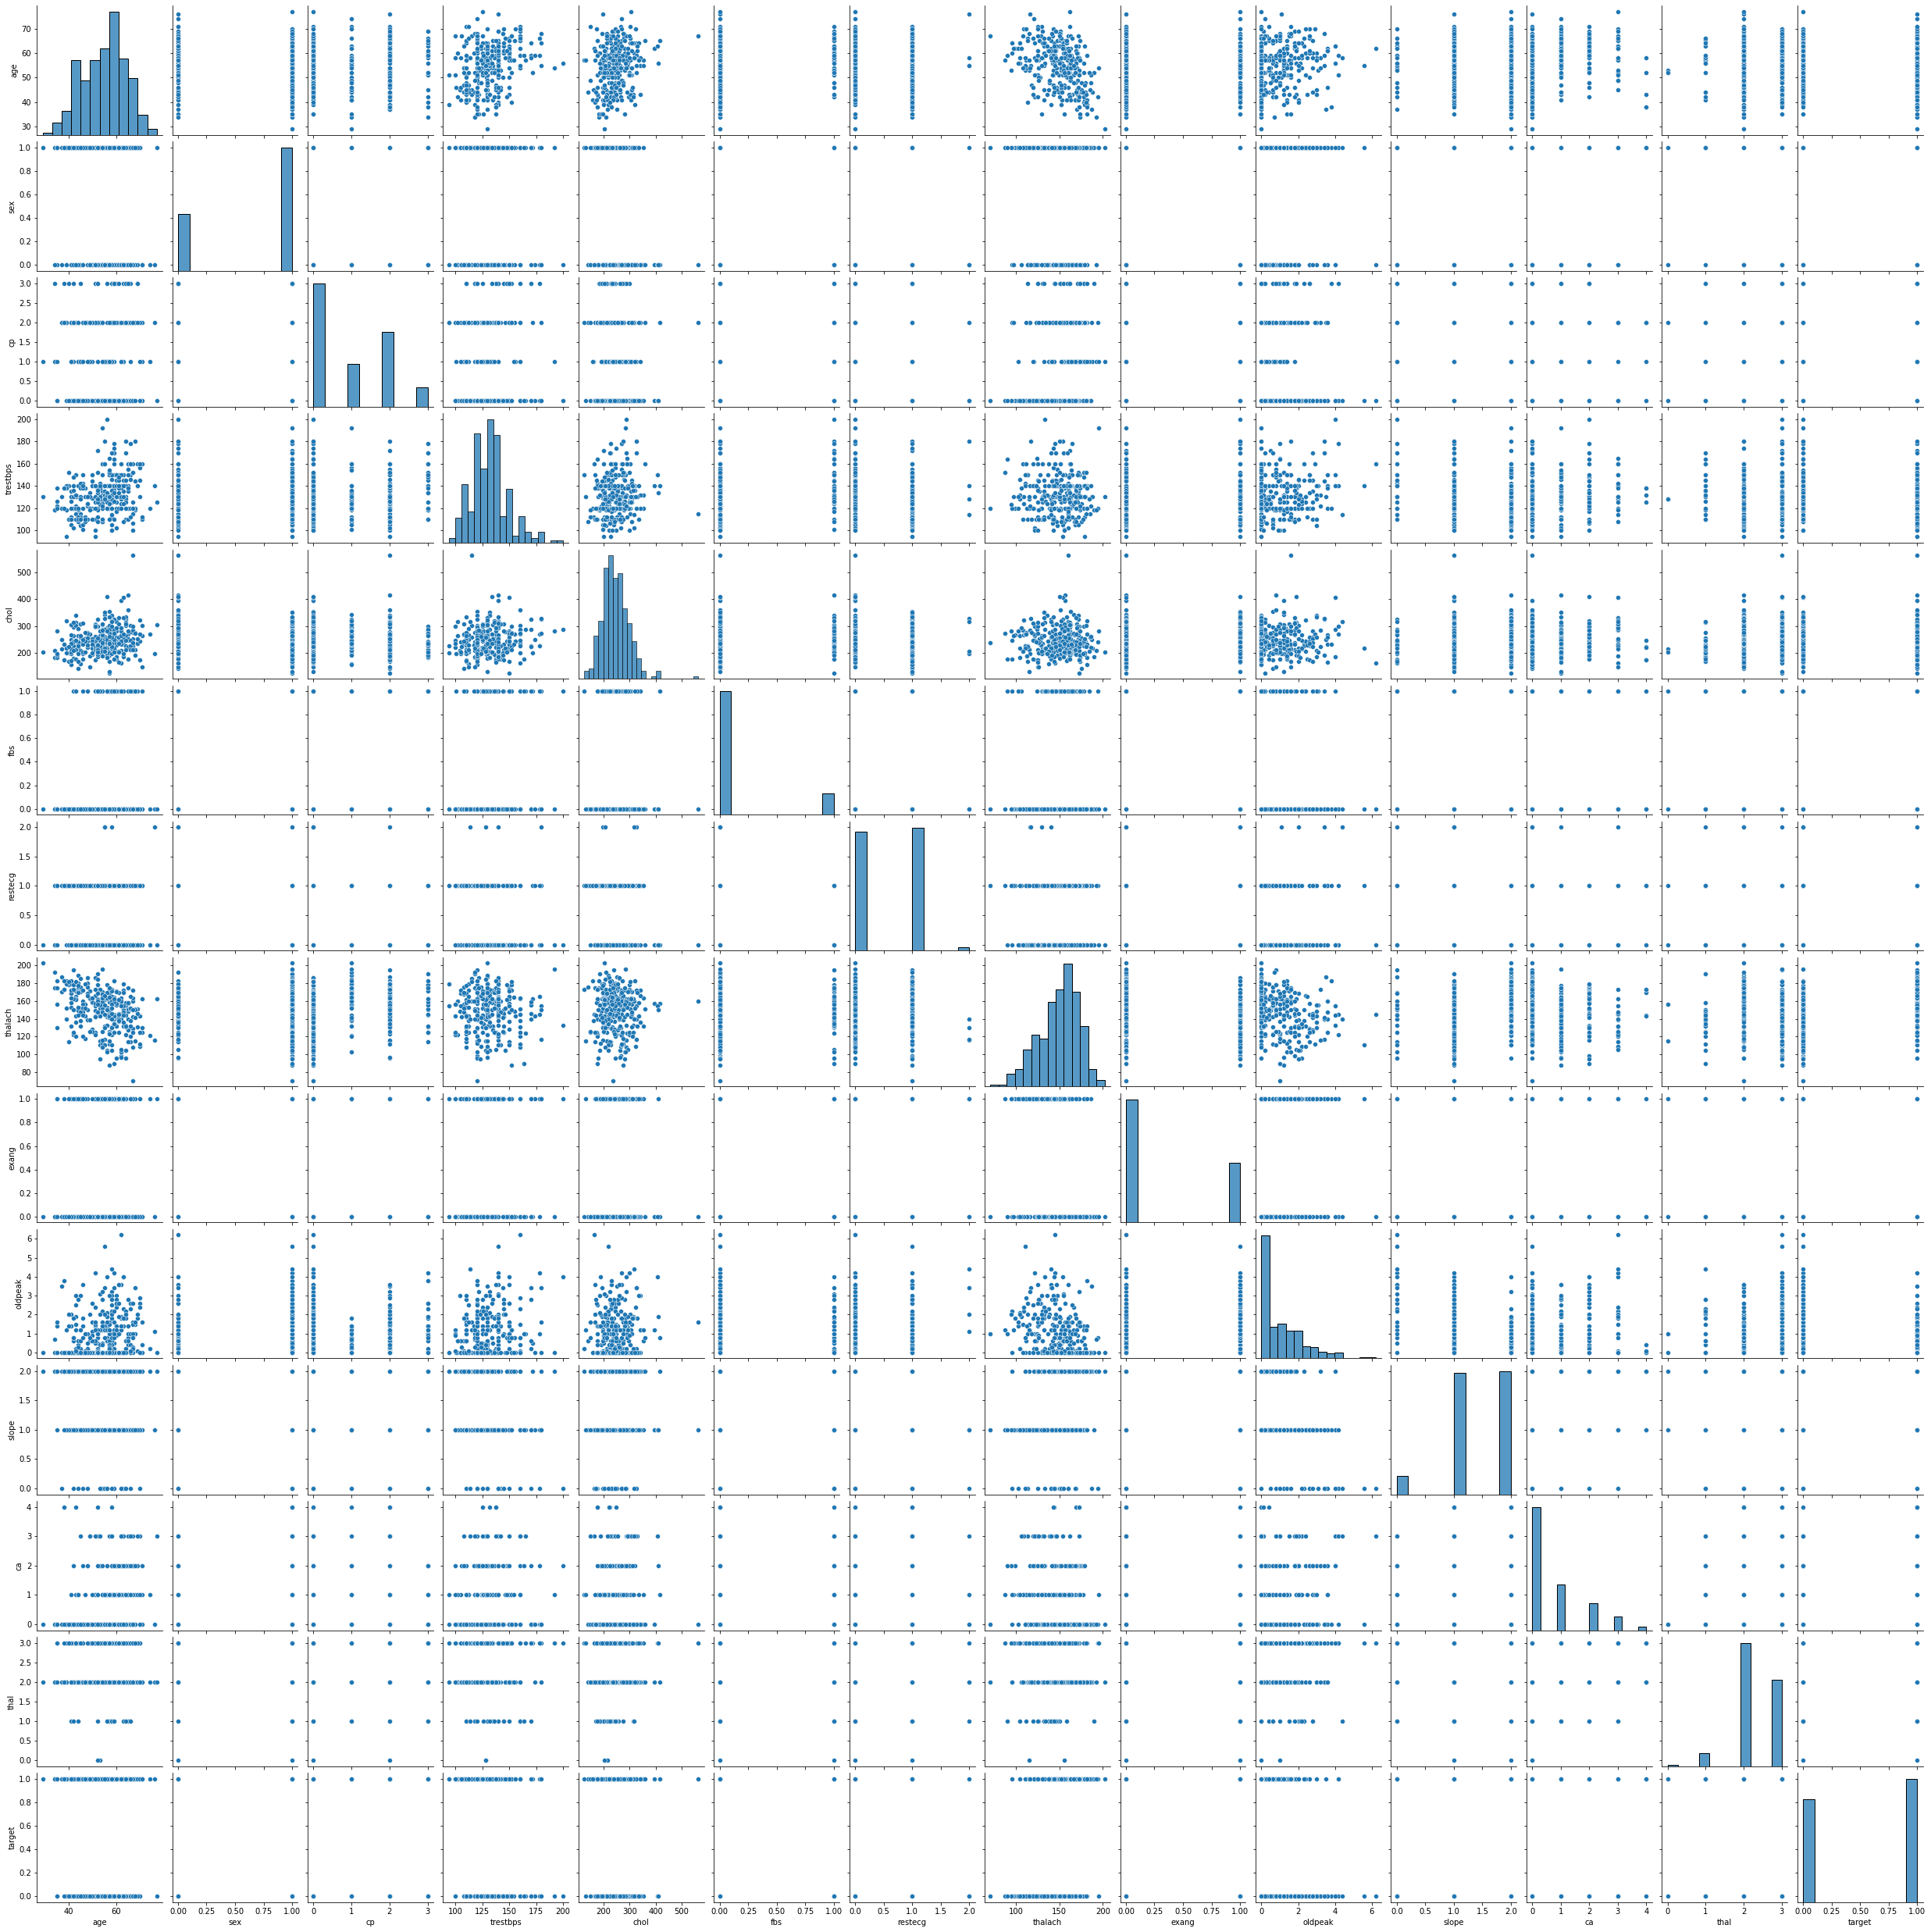

In [157]:
sns.pairplot(data)

In [158]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Train Test Split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X = df.drop('target',axis=1)
y = df['target']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Train the Support Vector Classifier

In [162]:
from sklearn.svm import SVC

In [163]:
# C=1.0, kernel='rbf', gamma='scale'
model = SVC()

In [164]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predictions and Evaluations
Sekarang lanjut menggunakan trained model

In [165]:
predictions = model.predict(X_test)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
print(confusion_matrix(y_test,predictions))

[[11 12]
 [ 4 19]]


In [168]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.61      0.83      0.70        23

    accuracy                           0.65        46
   macro avg       0.67      0.65      0.64        46
weighted avg       0.67      0.65      0.64        46



Mengklasifikasikan semuanya ke dalam satu kelas,
berarti model ini perlu menyesuaikan parameternya (membantu menormalkan data).

mencari parameter menggunakan GridSearch

# GridSearch

In [169]:
param_grid = {'C': [0.001,0.01,0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [170]:
from sklearn.model_selection import GridSearchCV

Menambahkan reparasi = Benar
Memilih verbose ke nomor apa pun yang diinginkan, semakin tinggi angkanya, semakin banyak verbose (verbose berarti output teks yang menjelaskan proses).

In [171]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [172]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ........ C=0.001, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [173]:
# Mengecek parameter terbaik
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [174]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Kemudian dapat dijalankan kembali prediksi pada objek ini seperti yang Anda lakukan dengan model normal.

In [175]:
grid_predictions = grid.predict(X_test)

In [176]:
print(confusion_matrix(y_test,grid_predictions))

[[15  8]
 [ 2 21]]


In [177]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.72      0.91      0.81        23

    accuracy                           0.78        46
   macro avg       0.80      0.78      0.78        46
weighted avg       0.80      0.78      0.78        46



# Test a Sample

In [178]:
test_index = 1

test_dic = {0:'No Heart Disease', 1: 'Heart Disease'}
y_test_np = np.array(y_test)
print(f'Actual     --> {test_dic[y_test_np[test_index]]}\nPrediction --> {test_dic[predictions[test_index]]}')

Actual     --> Heart Disease
Prediction --> Heart Disease


# Referensi

Referensi : https://github.com/elakiricoder/Heart_Disease_Prediction_Support_Vector_Machines_SVM/blob/main/Heart_disease_Dataset_Support_Vector_Machine.ipynb

Dataset : https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv
